In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/rodrigo210399/csv_files/main/coffee_chain.csv'
url_content = requests.get(df_url, verify=False).content   #Download content
cdc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
cdc.shape

(1062, 22)

In [ ]:
cdc.sample(10, random_state=999)


,area_code,cogs,difference_between_actual_and_target_profit,date,inventory,margin,market_size,market,marketing,ji_lu_shu,...,product,profit,sales,state,target_cogs,target_margin,target_profit,target_sales,total_expenses,type
780,630,127,-8,2012-12-01T00:00:00,830,185,Major Market,Central,40,1,...,Decaf Irish Cream,122,312,Illinois,120,180,130,300,63,Decaf
596,225,94,7,2012-12-01T00:00:00,540,120,Small Market,South,31,1,...,Chamomile,77,214,Louisiana,80,110,70,190,43,Decaf
452,702,23,-3,2012-12-01T00:00:00,807,35,Small Market,West,6,1,...,Decaf Espresso,17,58,Nevada,20,30,20,50,18,Decaf
767,719,88,10,2012-11-01T00:00:00,561,112,Major Market,Central,29,1,...,Green Tea,70,200,Colorado,70,90,60,160,42,Regular
96,254,50,31,2013-11-01T00:00:00,589,73,Major Market,South,14,1,...,Decaf Espresso,71,131,Texas,30,60,40,90,25,Decaf
1033,971,102,62,2013-11-01T00:00:00,666,143,Small Market,West,31,1,...,Green Tea,132,261,Oregon,70,100,70,170,54,Regular
759,224,228,-94,2012-11-01T00:00:00,1691,304,Major Market,Central,75,1,...,Caffe Mocha,196,532,Illinois,290,390,290,680,108,Regular
895,971,43,-51,2012-10-01T00:00:00,419,64,Small Market,West,13,1,...,Decaf Irish Cream,29,107,Oregon,50,100,80,150,35,Decaf
260,505,35,-12,2012-11-01T00:00:00,248,47,Small Market,South,11,1,...,Decaf Espresso,8,82,New Mexico,20,40,20,60,39,Decaf
307,505,35,-8,2013-11-01T00:00:00,248,47,Small Market,South,11,1,...,Decaf Espresso,12,87,New Mexico,20,40,20,60,39,Decaf


# Understanding the Variables

In [ ]:
from tabulate import tabulate

# Create a data dictionary for the coffee shop dataset
data_dict = [
    ['Pin code', 'Categorical Variable', 'Postal code of the coffee shop location'],
    ['COG - Cost Price', 'Continous Numeric Variable', 'Direct costs associated with producing or purchasing coffee and related products'],
    ['Difference between actual and target profit', 'Numeric descrete or Continous', 'Variance between actual profit and target profit'],
    ['Date', 'Numerical', 'Date of a specific record or transaction'],
    ['Inventory left', 'Numeric', 'Quantity of coffee-related items in stock'],
    ['Margin', 'Numeric discrete', 'Profit margin (selling price - cost price)'],
    ['Market Size', 'Categorical ordinal', 'Total population size around the coffee shop (Major Market or Small Market)'],
    ['Market', 'Categorical Ordinal', 'Region or area where the coffee shop is located'],
    ['Marketing', 'Numerical continous', 'Marketing budget in Thousands'],
    ['Product', 'Categorical (String)', 'Name of the coffee product'],
    ['Profit', 'Numeric discrete', 'Total profit generated by a specific product'],
    ['Sales', 'Numeric discrete', 'Total number of products sold'],
    ['State', 'Categorical ordinal', 'State where the cafe is located'],
    ['Target COGS', 'Numeric', 'Target cost of goods sold'],
    ['Target Margins', 'Numeric', 'Target profit margin for products'],
    ['Target Profit', 'Numeric', 'Target profit for a specific product or period'],
    ['Target Sales', 'Numeric', 'Number of units projected to be sold for a specific product'],
    ['Total Expense', 'Numeric', 'Total expenses incurred (product costs and operational costs)'],
    ['Type', 'Categorical Ordinal', 'Categorization of the coffee product (e.g., Decaf or Regular)']
]

# Format and print the tabulated data dictionary
print(tabulate(data_dict, headers=['Column Name', 'Data Type', 'Description'], tablefmt='fancy_grid'))


╒═════════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════╕
│ Column Name                                 │ Data Type                     │ Description                                                                      │
╞═════════════════════════════════════════════╪═══════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════╡
│ Pin code                                    │ Categorical Variable          │ Postal code of the coffee shop location                                          │
├─────────────────────────────────────────────┼───────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────┤
│ COG - Cost Price                            │ Continous Numeric Variable    │ Direct costs associated with producing or purchasing coffee and related products │
├─────────────────────

In [ ]:
# Checking if there are missing values

# Check for missing values in the entire dataset
missing_values = cdc.isna()

# Summarize missing values by column
missing_counts = missing_values.sum()

# Summarize total missing values in the entire dataset
total_missing = missing_counts.sum()

# Print the results
print("Missing values by column:")
print(missing_counts)
print("\nTotal missing values in the dataset:", total_missing)


Missing values by column:
area_code                                      0
cogs                                           0
difference_between_actual_and_target_profit    0
date                                           0
inventory                                      0
margin                                         0
market_size                                    0
market                                         0
marketing                                      0
ji_lu_shu                                      0
product_line                                   0
product_type                                   0
product                                        0
profit                                         0
sales                                          0
state                                          0
target_cogs                                    0
target_margin                                  0
target_profit                                  0
target_sales                               

In [ ]:
#Transforming the date

# Assuming your date column is named 'dates', convert it to datetime
cdc['date'] = pd.to_datetime(cdc['date'])

# Format the date to 'YYYY-MM-DD' (Year-Month-Day)
cdc['date'] = cdc['date'].dt.strftime('%Y-%m-%d')

# Print the transformed dataset
print(cdc)

      area_code  cogs  difference_between_actual_and_target_profit  \
0           303    51                                          -35   
1           970    52                                          -24   
2           409    43                                          -22   
3           850    38                                          -15   
4           562    72                                            6   
...         ...   ...                                          ...   
1057        775   250                                          133   
1058        971    88                                           48   
1059        775   294                                         -285   
1060        503   134                                           80   
1061        435    20                                          -22   

            date  inventory  margin   market_size   market  marketing  \
0     2012-10-01        503      71  Major Market  Central         46   
1     2012-10

In [ ]:
# deleting the column ji_lu_shu

cdc = cdc.drop(columns=['ji_lu_shu'])

In [ ]:
cdc.sample(10, random_state=999)

,area_code,cogs,difference_between_actual_and_target_profit,date,inventory,margin,market_size,market,marketing,product_line,...,product,profit,sales,state,target_cogs,target_margin,target_profit,target_sales,total_expenses,type
780,630,127,-8,2012-12-01,830,185,Major Market,Central,40,Beans,...,Decaf Irish Cream,122,312,Illinois,120,180,130,300,63,Decaf
596,225,94,7,2012-12-01,540,120,Small Market,South,31,Leaves,...,Chamomile,77,214,Louisiana,80,110,70,190,43,Decaf
452,702,23,-3,2012-12-01,807,35,Small Market,West,6,Beans,...,Decaf Espresso,17,58,Nevada,20,30,20,50,18,Decaf
767,719,88,10,2012-11-01,561,112,Major Market,Central,29,Leaves,...,Green Tea,70,200,Colorado,70,90,60,160,42,Regular
96,254,50,31,2013-11-01,589,73,Major Market,South,14,Beans,...,Decaf Espresso,71,131,Texas,30,60,40,90,25,Decaf
1033,971,102,62,2013-11-01,666,143,Small Market,West,31,Leaves,...,Green Tea,132,261,Oregon,70,100,70,170,54,Regular
759,224,228,-94,2012-11-01,1691,304,Major Market,Central,75,Beans,...,Caffe Mocha,196,532,Illinois,290,390,290,680,108,Regular
895,971,43,-51,2012-10-01,419,64,Small Market,West,13,Beans,...,Decaf Irish Cream,29,107,Oregon,50,100,80,150,35,Decaf
260,505,35,-12,2012-11-01,248,47,Small Market,South,11,Beans,...,Decaf Espresso,8,82,New Mexico,20,40,20,60,39,Decaf
307,505,35,-8,2013-11-01,248,47,Small Market,South,11,Beans,...,Decaf Espresso,12,87,New Mexico,20,40,20,60,39,Decaf


In [ ]:
# Checking to see if Cogs+profit is sales cost

# Checking if there are unique entries of area code

# Check if "area_code" has unique entries
is_unique = cdc['area_code'].is_unique

if is_unique:
    print("The 'area_code' column has unique entries.")
else:
    # Find the number of duplicate entries
    num_duplicates = len(cdc) - len(cdc['area_code'].unique())
    print("The 'area_code' column has", num_duplicates, "duplicate entries.")

The 'area_code' column has 913 duplicate entries.


In [ ]:
#sorting entries based on area code

# Sort the DataFrame based on 'area_code'
cdc = cdc.sort_values(by='area_code')

# Group the DataFrame by 'area_code'
grouped = cdc.groupby('area_code')

# Iterate through the groups and append them to a new DataFrame
sorted_df = pd.DataFrame()
for name, group in grouped:
    sorted_df = pd.concat([sorted_df, group], ignore_index=True)

# Sort the DataFrame by unique 'area_code'
unique_area_codes = sorted_df['area_code'].unique()
sorted_df = sorted_df[sorted_df['area_code'].isin(unique_area_codes)]

# Reset the index of the sorted DataFrame
sorted_df.reset_index(drop=True, inplace=True)

# Print the sorted DataFrame
print(sorted_df)

      area_code  cogs  difference_between_actual_and_target_profit  \
0           203    53                                           -1   
1           203    36                                           -7   
2           203    24                                          -13   
3           203    49                                           -9   
4           203   125                                           41   
...         ...   ...                                          ...   
1057        985    60                                          -12   
1058        985    49                                           -2   
1059        985    41                                           11   
1060        985    55                                           -3   
1061        985   101                                           46   

            date  inventory  margin   market_size market  marketing  \
0     2013-11-01        380      71  Small Market   East         17   
1     2012-11-01 

In [ ]:
unique_area_codes = cdc['area_code'].nunique()

print("The number of unique 'area_code' values is:", unique_area_codes)

The number of unique 'area_code' values is: 149


Q1) **two plots displaying the distribution of a single continuous

---

variable**

---




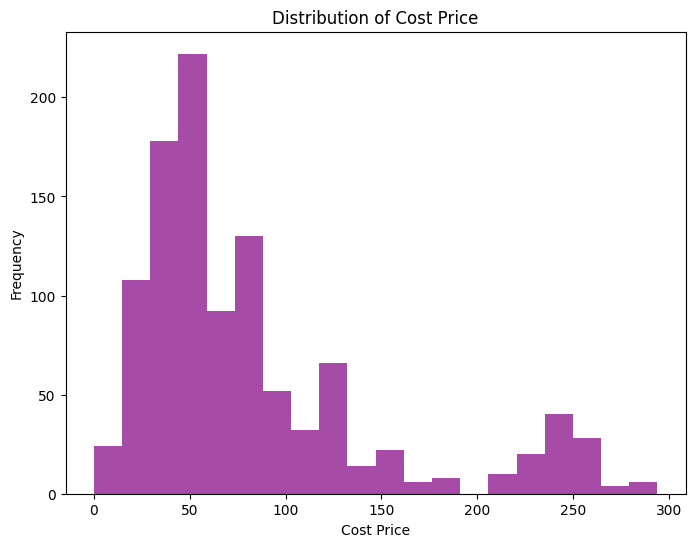

In [ ]:
#change of cost price

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(cdc['cogs'], bins=20, color='purple', alpha=0.7)
plt.title("Distribution of Cost Price")
plt.xlabel("Cost Price")
plt.ylabel("Frequency")
plt.show()


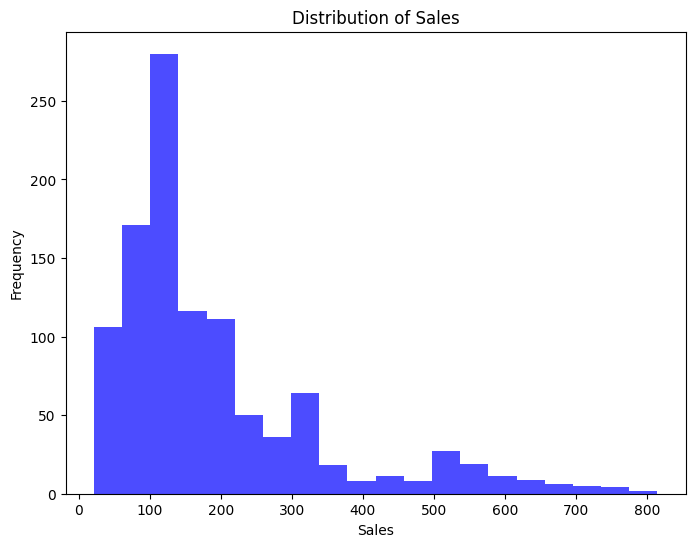

In [ ]:
#Distribution for sales

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(cdc['sales'], bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


**Q2:Two plots displaying information about a single categorical variable**

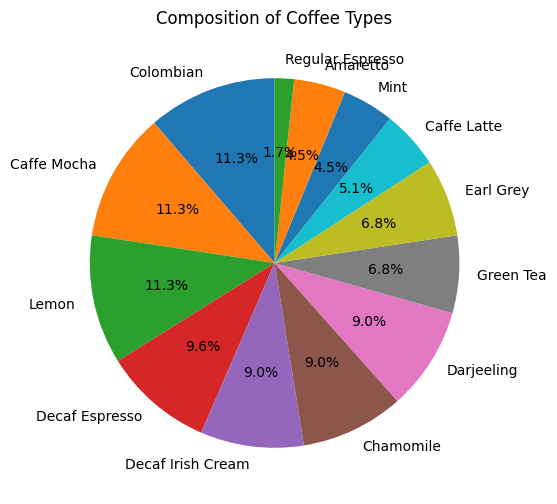

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
cdc['product'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Composition of Coffee Types")
plt.ylabel(None)  # Remove the y-axis label
plt.show()


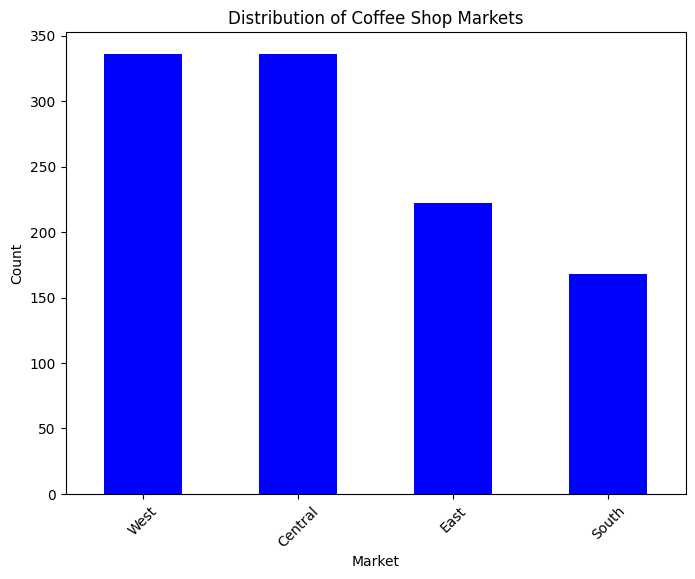

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
cdc['market'].value_counts().plot(kind='bar', color='blue')
plt.title("Distribution of Coffee Shop Markets")
plt.xlabel("Market")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Q3 - One plot displaying information about both a continuous variable and a categoricalvariable**

Objective chosen

Whats the relationship between profit and type of coffee product sold.

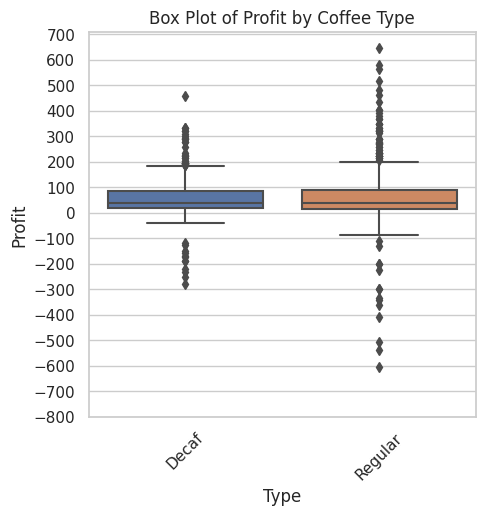

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

# Customize the x-axis and y-axis scales
x_ticks = [-700,-600,-500,-400,-300,-200,-100, 0, 100, 200, 300, 400, 500, 600, 700, 800]
y_ticks = [-800,-700,-600,-500,-400,-300,-200,-100, 0, 100, 200, 300, 400, 500, 600, 700]

sns.boxplot(x="type", y="profit", data=cdc)

plt.title("Box Plot of Profit by Coffee Type")
plt.xlabel("Type")
plt.ylabel("Profit")

plt.xticks(rotation=45)

# Set custom x-axis ticks and labels
plt.xticks(range(len(cdc['type'].unique())), cdc['type'].unique())

plt.yticks(y_ticks)  # Add custom y-axis ticks

plt.show()


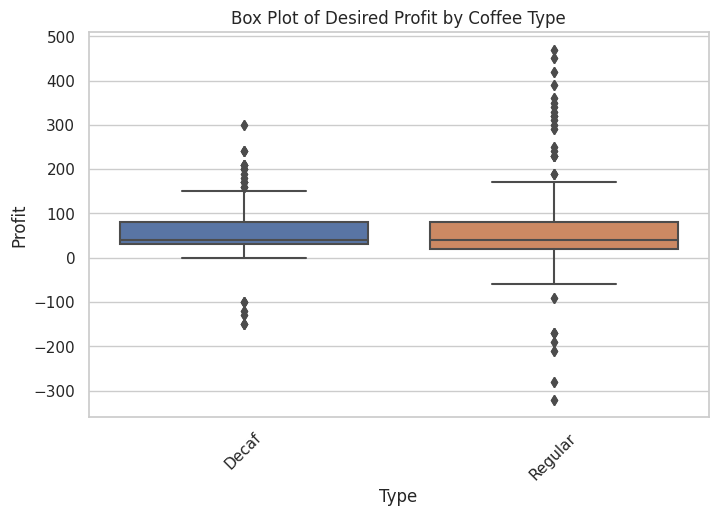

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Customize the x-axis and y-axis scales
x_ticks = [-800,-700,-600,-500,-400,-300,-200,-100, 0, 100, 200, 300, 400, 500]
y_ticks = [-300,-200,-100, 0, 100, 200, 300, 400, 500]

sns.boxplot(x="type", y="target_profit", data=cdc)

plt.title("Box Plot of Desired Profit by Coffee Type")
plt.xlabel("Type")
plt.ylabel("Profit")

plt.xticks(rotation=45)

# Set custom x-axis ticks and labels
plt.xticks(range(len(cdc['type'].unique())), cdc['type'].unique())

plt.yticks(y_ticks)  # Add custom y-axis ticks

plt.show()


**Q4:two plots should display information that shows a relationship between two variables**

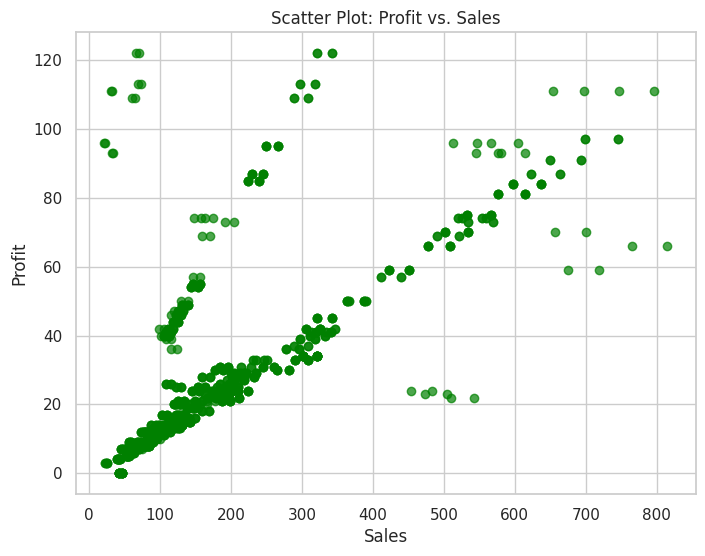

In [ ]:
# Scatter plot between marketing and sales

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(cdc['sales'], cdc['marketing'], color='green', alpha=0.7)
plt.title("Scatter Plot: Profit vs. Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


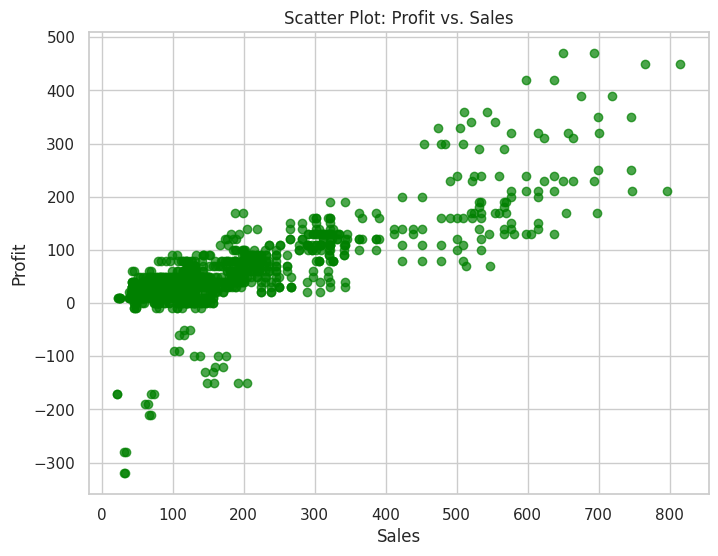

In [ ]:
# Scatter plot between marketing and sales

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(cdc['sales'], cdc['target_profit'], color='green', alpha=0.7)
plt.title("Scatter Plot: Profit vs. Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


In [ ]:
# Scatter plot between marketing and sales
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(cdc['marketing'], cdc['sales'], color='green', alpha=0.7)
plt.title("Scatter Plot: Profit vs. Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


NameError: ignored

<Figure size 800x600 with 0 Axes>

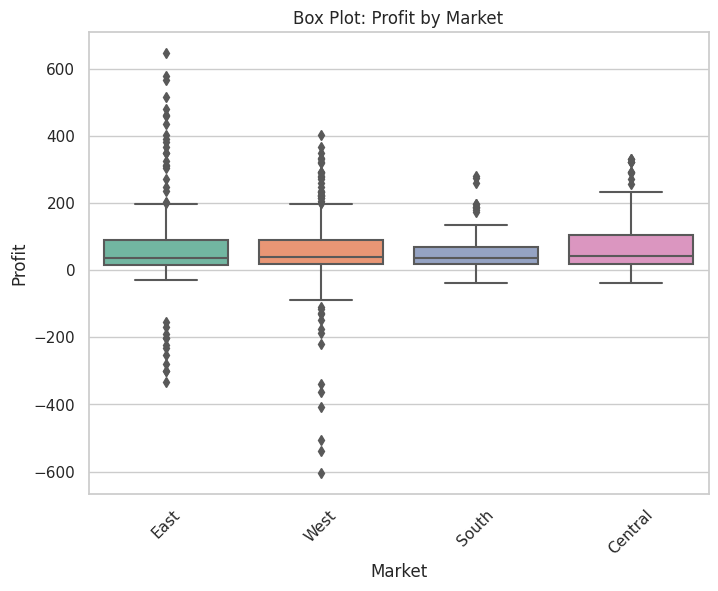

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.boxplot(x="market", y="profit", data=cdc, palette="Set2")
plt.title("Box Plot: Profit by Market")
plt.xlabel("Market")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()


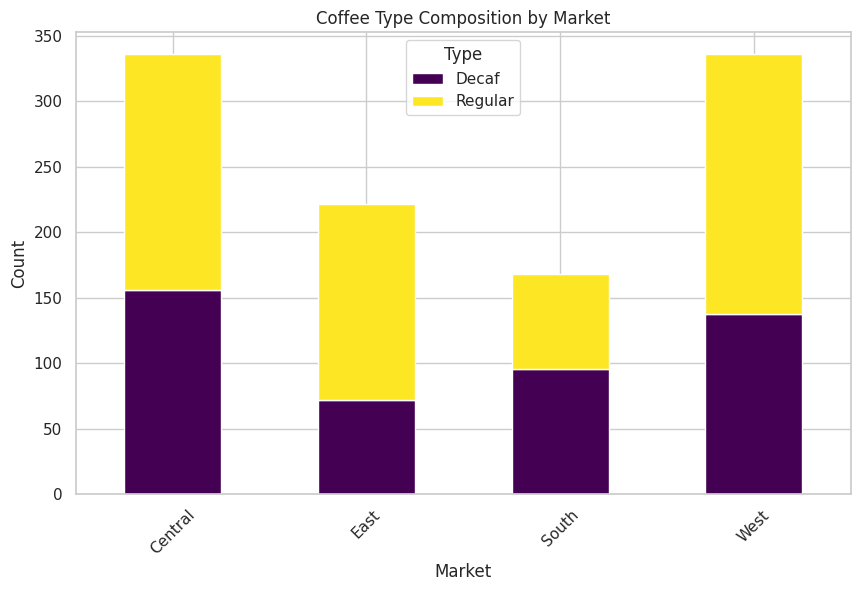

In [ ]:
import matplotlib.pyplot as plt


cross_table = pd.crosstab(cdc['market'], cdc['type'])
cross_table.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("Coffee Type Composition by Market")
plt.xlabel("Market")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()


In [ ]:
i=0
while i<5:
  print(i)
  i+=1
  if i==3:
    break
else:
    print(0)

0
1
2
